In [1]:
import numpy as np
import pandas as pd
from scipy.optimize import fmin
import scipy.stats as si
from scipy.stats import norm
from scipy.optimize import minimize
import numpy as np
from scipy.stats import norm
from scipy.optimize import fsolve
from matplotlib import pyplot as plt

In [2]:
# Parameters
T = 1/4

In [3]:
# Import Data
df = pd.read_excel("10Y_Asset_Liability_Data_T.xlsx")
df.set_index('Date', inplace=True)
df_formatted = df.style.format("{:,.2f}")
df_formatted

,PFE Assets,PFE Liabilities,PFE Vol,BAX Assets,BAX Liabilities,BAX Vol,XRX Assets,XRX Liabilities,XRX Vol,BXP Assets,BXP Liabilities,BXP Vol,VNO Assets,VNO Liabilities,VNO Vol,APA Assets,APA Liabilities,APA Vol,OVV Assets,OVV Liabilities,OVV Vol,ALLY Assets,ALLY Liabilities,ALLY Vol,MBI Assets,MBI Liabilities,MBI Vol
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,
12/31/2013,"172,101,000,000.00","95,481,000,000.00",0.15,"25,224,000,000.00","16,738,000,000.00",0.16,"29,036,000,000.00","16,617,000,000.00",0.26,"20,176,264,000.00","12,981,725,000.00",0.20,"20,097,224,000.00","11,498,860,000.00",0.17,"61,637,000,000.00","26,244,000,000.00",0.21,"17,648,000,000.00","12,501,000,000.00",0.23,"151,167,000,000.00","136,959,000,000.00",0.22,"16,953,000,000.00","13,654,000,000.00",0.49
03/31/2014,"171,808,000,000.00","93,740,000,000.00",0.22,"25,261,000,000.00","16,568,000,000.00",0.17,"28,868,000,000.00","16,532,000,000.00",0.26,"18,979,568,000.00","11,825,385,000.00",0.17,"20,369,352,000.00","11,819,194,000.00",0.16,"61,121,000,000.00","25,944,000,000.00",0.20,"17,192,000,000.00","11,958,000,000.00",0.27,"148,452,000,000.00","133,993,000,000.00",0.22,"16,087,000,000.00","12,462,000,000.00",0.37
06/30/2014,"172,612,000,000.00","95,656,000,000.00",0.13,"25,629,000,000.00","16,942,000,000.00",0.17,"28,508,000,000.00","16,103,000,000.00",0.24,"18,898,533,000.00","11,762,849,000.00",0.15,"20,736,779,000.00","12,317,467,000.00",0.15,"61,171,000,000.00","26,279,000,000.00",0.25,"18,722,000,000.00","11,793,000,000.00",0.26,"149,937,000,000.00","135,059,000,000.00",0.22,"16,024,000,000.00","12,216,000,000.00",0.35
09/30/2014,"171,362,000,000.00","93,057,000,000.00",0.17,"25,563,000,000.00","17,137,000,000.00",0.15,"27,877,000,000.00","15,969,000,000.00",0.24,"18,875,160,000.00","11,721,440,000.00",0.17,"21,000,515,000.00","12,635,544,000.00",0.15,"60,990,000,000.00","28,004,000,000.00",0.23,"21,334,000,000.00","11,836,000,000.00",0.31,"149,195,000,000.00","134,005,000,000.00",0.21,"16,201,000,000.00","12,299,000,000.00",0.37
12/31/2014,"167,566,000,000.00","95,945,000,000.00",0.19,"25,917,000,000.00","17,761,000,000.00",0.17,"27,658,000,000.00","16,905,000,000.00",0.25,"19,886,767,000.00","11,878,506,000.00",0.16,"21,157,980,000.00","12,330,818,000.00",0.16,"55,952,000,000.00","27,815,000,000.00",0.39,"24,531,000,000.00","14,846,000,000.00",0.49,"151,631,000,000.00","136,232,000,000.00",0.30,"16,284,000,000.00","12,334,000,000.00",0.31
03/31/2015,"160,640,000,000.00","93,053,000,000.00",0.17,"24,861,000,000.00","17,573,000,000.00",0.16,"26,657,000,000.00","16,411,000,000.00",0.25,"19,179,071,000.00","11,073,970,000.00",0.18,"19,261,051,000.00","10,912,613,000.00",0.17,"48,650,000,000.00","25,245,000,000.00",0.31,"22,836,000,000.00","13,319,000,000.00",0.39,"153,524,000,000.00","137,590,000,000.00",0.29,"15,915,000,000.00","11,975,000,000.00",0.37
06/30/2015,"160,878,000,000.00","93,698,000,000.00",0.18,"30,015,000,000.00","21,994,000,000.00",0.16,"26,016,000,000.00","15,919,000,000.00",0.27,"19,113,959,000.00","11,019,279,000.00",0.20,"19,585,907,000.00","11,187,703,000.00",0.19,"35,312,000,000.00","17,557,000,000.00",0.29,"19,043,000,000.00","11,226,000,000.00",0.38,"156,472,000,000.00","142,177,000,000.00",0.23,"15,510,000,000.00","11,669,000,000.00",1.18
09/30/2015,"170,867,000,000.00","103,743,000,000.00",0.29,"20,172,000,000.00","12,327,000,000.00",0.33,"24,946,000,000.00","15,789,000,000.00",0.44,"18,980,263,000.00","10,917,504,000.00",0.22,"19,971,926,000.00","11,413,540,000.00",0.22,"27,812,000,000.00","15,840,000,000.00",0.48,"17,294,000,000.00","10,575,000,000.00",0.63,"156,105,000,000.00","141,506,000,000.00",0.32,"15,051,000,000.00","11,337,000,000.00",0.69
12/31/2015,"167,381,000,000.00","102,383,000,000.00",0.17,"20,962,000,000.00","12,097,000,000.00",0.23,"25,541,000,000.00","16,075,000,000.00",0.35,"18,351,486,000.00","10,464,559,000.00",0.21,"21,143,293,000.00","12,437,994,000.00",0.18,"18,842,000,000.00","14,614,000,000.00",0.42,"15,614,000,0

In [24]:
df_realised_default = pd.read_excel("1Y_Default_Prob.xlsx")
interest_rate = pd.read_excel("Interest Rate 10 Year.xlsx")
interest_rate.set_index('Date', inplace=True)

In [25]:
df_realised_default

,Ticker,Default Prob
0,PFE,0.000033
1,BAX,0.001410
2,XRX,0.008240
3,BXP,0.009248
4,VNO,0.012700
5,APA,0.001075
6,OVV,0.002455
7,ALLY,0.003950
8,MBI,0.019700


In [36]:
time_series_def_prob= pd.read_excel("time_series_default_prob.xlsx")
time_series_def_prob.set_index('Date', inplace=True)
time_series_def_prob=time_series_def_prob.resample('3M').mean()

In [37]:
time_series_def_prob

,PFE,BAX,XRX,BXP,VNO,APA,OVV,ALLY,MBI
Date,,,,,,,,,
2013-12-31,0.000053,0.000168,0.001964,0.002635,0.001007,0.000362,0.002368,0.071382,0.029114
2014-03-31,0.000051,0.000161,0.002335,0.002463,0.000917,0.000337,0.001899,0.023367,0.024325
2014-06-30,0.000084,0.000121,0.002124,0.001606,0.000598,0.000206,0.000701,0.004142,0.013409
2014-09-30,0.000064,0.000063,0.001610,0.000603,0.000252,0.000113,0.000554,0.006526,0.012780
2014-12-31,0.000058,0.000052,0.001921,0.000319,0.000133,0.000869,0.002307,0.008271,0.012549
2015-03-31,0.000046,0.000101,0.002534,0.000255,0.000099,0.002757,0.008081,0.006470,0.019830
2015-06-30,0.000026,0.000102,0.003596,0.000607,0.000253,0.004656,0.011761,0.009252,0.020024
2015-09-30,0.000051,0.001274,0.005064,0.001206,0.000651,0.007840,0.030462,0.009295,0.034411
2015-12-31,0.000218,0.001139,0.006787,0.001618,0.000960,0.011942,0.056842,0.012834,0.075645


In [26]:
# Merton Model Function
def MertonModel(c):
  d1 = (np.log(A/K) + (r + c[1]**2/2)*T)/(c[1] * np.sqrt(T))
  d2 = d1 - c[1] * np.sqrt(T)
  res1 = A* norm.cdf(d1) - np.exp(-r*T) * K * norm.cdf(d2) - c[0]
  res2 = (E_vol * norm.cdf(d1) * c[0]) - A*c[1]
  return(res1**2+res2**2)

In [27]:
# Default Probability Function
def default_prob(A, K, A_vol, T, r):
  dd = (np.log(A/K) + (r-(A_vol**2)/2)*T)/(A_vol * np.sqrt(T))
  return norm.cdf(-dd)

In [28]:
# Define the company names and corresponding columns in the DataFrame
companies = ['PFE', 'BAX', 'XRX', 'BXP', 'VNO', 'APA', 'OVV', 'ALLY', 'MBI']
columns = {'equity_value': [0, 3, 6, 9, 12, 15, 18, 21, 24],
           'asset_vol': [2, 5, 8, 11, 14, 17, 20, 23, 26]}

# Initialize lists for equity values and asset volatilities
equity_values = {company: [] for company in companies}
asset_vols = {company: [] for company in companies}

# Loop through the DataFrame and calculate equity values and asset volatilities
for i in range(len(df)):
    for company in companies:
        A = df.iloc[i][columns['equity_value'][companies.index(company)]]
        K = df.iloc[i][columns['equity_value'][companies.index(company)] + 1]
        E_vol = df.iloc[i][columns['asset_vol'][companies.index(company)]]
        r=interest_rate["Interest Rate"].iloc[i]
        c = fmin(MertonModel, [A - K, E_vol])
        equity_values[company].append(c[0])
        asset_vols[company].append(c[1])

# Example: Accessing the results for a specific company
equity_values = pd.DataFrame(equity_values)
asset_vols = pd.DataFrame(asset_vols)

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 115
         Function evaluations: 217
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 109
         Function evaluations: 210
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 108
         Function evaluations: 207
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 107
         Function evaluations: 205
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 103
         Function evaluations: 197
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 109
         Function evaluations: 210
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 112
         Function evaluations: 213
Optimization termina

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 107
         Function evaluations: 208
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 112
         Function evaluations: 217
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 116
         Function evaluations: 224
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 112
         Function evaluations: 217
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 110
         Function evaluations: 217
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 107
         Function evaluations: 206
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 113
         Function evaluations: 213
Optimization termina

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 101
         Function evaluations: 197
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 114
         Function evaluations: 214
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 107
         Function evaluations: 206
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 108
         Function evaluations: 205
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 100
         Function evaluations: 194
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 102
         Function evaluations: 199
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 108
         Function evaluations: 208
Optimization termina

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 110
         Function evaluations: 212
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 110
         Function evaluations: 215
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 124
         Function evaluations: 240
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 109
         Function evaluations: 214
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 116
         Function evaluations: 221
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 103
         Function evaluations: 198
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 109
         Function evaluations: 211
Optimization termina

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 122
         Function evaluations: 235
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 119
         Function evaluations: 231
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 114
         Function evaluations: 216
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 106
         Function evaluations: 203
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 113
         Function evaluations: 213
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 110
         Function evaluations: 217
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 111
         Function evaluations: 216
Optimization termina

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 112
         Function evaluations: 214
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 109
         Function evaluations: 211
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 110
         Function evaluations: 213
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 122
         Function evaluations: 235
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 105
         Function evaluations: 206
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 118
         Function evaluations: 224
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 112
         Function evaluations: 216
Optimization termina

In [29]:
equity_values_formatted = equity_values.style.format("{:,.2f}")
equity_values_formatted

,PFE,BAX,XRX,BXP,VNO,APA,OVV,ALLY,MBI
0,"77,704,922,081.64","8,676,188,894.15","12,607,814,007.30","7,342,046,463.37","8,729,022,111.33","35,691,202,732.59","5,289,045,128.80","15,764,224,205.64","3,454,146,696.91"
1,"78,962,832,280.74","8,851,156,403.11","12,493,812,750.86","7,267,066,894.07","8,662,982,795.43","35,424,658,722.97","5,348,149,823.05","15,738,083,228.01","3,743,960,954.61"
2,"77,781,657,879.14","8,833,235,424.73","12,543,993,568.91","7,237,215,414.21","8,525,630,617.54","35,118,828,044.30","7,030,791,663.55","16,043,766,156.84","3,913,442,801.83"
3,"79,202,091,083.25","8,591,204,658.37","12,061,944,867.21","7,266,717,402.74","8,486,780,577.51","33,255,965,061.15","9,612,101,787.74","16,481,839,309.36","4,020,565,215.25"
4,"72,534,956,622.03","8,325,188,426.33","10,914,034,308.15","8,121,413,735.61","8,944,623,386.90","28,401,961,211.55","9,826,420,643.49","16,696,724,097.48","4,067,491,698.12"
5,"68,285,265,403.13","7,419,866,978.27","10,369,147,384.08","8,188,199,558.09","8,430,325,742.64","23,594,437,311.02","9,616,945,159.26","16,966,468,988.82","4,029,859,845.53"
6,"67,726,067,373.45","8,149,179,959.14","10,189,775,155.48","8,158,899,820.50","8,463,405,387.35","17,857,321,339.58","7,882,424,580.40","15,123,600,620.66","3,926,007,952.72"
7,"67,514,917,391.01","7,891,449,771.83","9,216,495,048.74","8,103,897,603.86","8,601,393,733.33","12,031,687,231.93","6,758,859,762.03","15,132,213,386.29","3,756,838,544.49"
8,"65,377,978,724.03","8,909,896,150.97","9,525,659,884.83","7,925,764,597.81","8,751,460,697.64","4,282,237,613.68","6,202,167,563.85","13,977,672,162.01","3,782,408,641.18"
9,"63,711,796,129.65","9,050,515,070.60","9,568,212,936.17","7,970,987,323.47","8,522,650,432.67","3,605,743,824.21","5,540,990,732.07","14,345,683,229.62","3,672,379,821.13"


In [30]:
asset_vols_formatted = asset_vols.style.format("{:,.2f}")
asset_vols_formatted

,PFE,BAX,XRX,BXP,VNO,APA,OVV,ALLY,MBI
0,0.07,0.05,0.11,0.07,0.07,0.12,0.07,0.02,0.10
1,0.10,0.06,0.11,0.06,0.07,0.12,0.09,0.02,0.09
2,0.06,0.06,0.11,0.06,0.06,0.14,0.10,0.02,0.09
3,0.08,0.05,0.10,0.07,0.06,0.13,0.14,0.02,0.09
4,0.08,0.05,0.10,0.07,0.07,0.20,0.20,0.03,0.08
5,0.07,0.05,0.10,0.08,0.08,0.15,0.16,0.03,0.09
6,0.07,0.04,0.11,0.09,0.08,0.15,0.16,0.02,0.29
7,0.12,0.13,0.16,0.10,0.10,0.21,0.25,0.03,0.17
8,0.07,0.10,0.13,0.09,0.07,0.10,0.29,0.03,0.18
9,0.07,0.11,0.11,0.08,0.08,0.09,0.29,0.03,0.14


In [40]:
# Initializing Default Probability dictionary for each company
default_probs = {company: [] for company in companies}

# Storing Default Probability values into the dictionary
for i in range(len(df)):
    for company in companies:
        equity_col, asset_vol_col = columns['equity_value'][companies.index(company)], columns['asset_vol'][companies.index(company)]
        default_probs[company].append(default_prob(df.iloc[i][equity_col], df.iloc[i][equity_col + 1], asset_vols[company][i], 4, interest_rate["Interest Rate"].iloc[i]))

# Convert the lists in the dictionary to NumPy arrays and multiply by 100
default_probs = {company: np.array(default_probs[company]) * 100 for company in companies}
default_probs = pd.DataFrame(default_probs, index = df.index)
default_probs

,PFE,BAX,XRX,BXP,VNO,APA,OVV,ALLY,MBI
Date,,,,,,,,,
12/31/2013,1.399688e-06,0.000002,0.087148,0.001594,0.000022,0.001283,0.009418,1.118176e-07,2.860605
03/31/2014,9.165142e-03,0.000048,0.113185,0.000097,0.000045,0.001192,0.160904,4.541250e-06,1.075534
06/30/2014,6.199367e-08,0.000167,0.067652,0.000005,0.000003,0.045965,0.174412,2.455771e-05,1.134329
09/30/2014,4.396079e-05,0.000003,0.047536,0.000104,0.000006,0.018944,0.627164,1.590885e-06,1.214502
12/31/2014,1.006062e-03,0.000047,0.076748,0.000047,0.000012,2.674210,7.210100,4.250830e-03,0.351836
03/31/2015,3.294520e-04,0.000041,0.113055,0.000599,0.000452,0.712840,3.179015,1.606685e-02,2.039248
06/30/2015,1.230387e-03,0.000342,0.408370,0.013060,0.004623,0.587857,3.424803,1.249465e-03,36.086681
09/30/2015,1.060121e+00,2.283507,7.473093,0.092140,0.079966,9.882288,19.283871,6.006379e-01,20.328952
12/31/2015,2.437912e-03,0.144657,2.867032,0.039221,0.005019,6.175834,24.864346,4.173607e-01,22.289363


In [38]:
# Creating a Data Frame for all the time series values
time_series_df = pd.DataFrame(index=range(40), columns=range(9))
column_names = ['PFE', 'BAX', 'XRX', 'BXP', 'VNO', 'APA', 'OVV', 'ALLY', 'MBI']
time_series_df.columns = column_names
time_series_df.index = default_probs.index

for i in range(len(time_series_df.columns)):
  time_series_df.iloc[:, i] = default_probs.iloc[:, i]

In [39]:
time_series_df

,PFE,BAX,XRX,BXP,VNO,APA,OVV,ALLY,MBI
Date,,,,,,,,,
12/31/2013,1.399688e-06,0.000002,0.087148,0.001594,0.000022,0.001283,0.009418,1.118176e-07,2.860605
03/31/2014,9.165142e-03,0.000048,0.113185,0.000097,0.000045,0.001192,0.160904,4.541250e-06,1.075534
06/30/2014,6.199367e-08,0.000167,0.067652,0.000005,0.000003,0.045965,0.174412,2.455771e-05,1.134329
09/30/2014,4.396079e-05,0.000003,0.047536,0.000104,0.000006,0.018944,0.627164,1.590885e-06,1.214502
12/31/2014,1.006062e-03,0.000047,0.076748,0.000047,0.000012,2.674210,7.210100,4.250830e-03,0.351836
03/31/2015,3.294520e-04,0.000041,0.113055,0.000599,0.000452,0.712840,3.179015,1.606685e-02,2.039248
06/30/2015,1.230387e-03,0.000342,0.408370,0.013060,0.004623,0.587857,3.424803,1.249465e-03,36.086681
09/30/2015,1.060121e+00,2.283507,7.473093,0.092140,0.079966,9.882288,19.283871,6.006379e-01,20.328952
12/31/2015,2.437912e-03,0.144657,2.867032,0.039221,0.005019,6.175834,24.864346,4.173607e-01,22.289363


In [33]:
# Creating a Data Frame for threshold
thresholds = pd.DataFrame({col: [df_realised_default['Default Prob'].iloc[i]] for i, col in enumerate(column_names)})

# Create DataFrames for above and below thresholds with the date index
above_thresholds_df = pd.DataFrame(index=time_series_df.index)
below_thresholds_df = pd.DataFrame(index=time_series_df.index)

# Iterate through columns and create above and below threshold signals
for col in column_names:
    above_thresholds_df[col] = time_series_df[col] > thresholds[col][0]
    below_thresholds_df[col] = time_series_df[col] < thresholds[col][0]

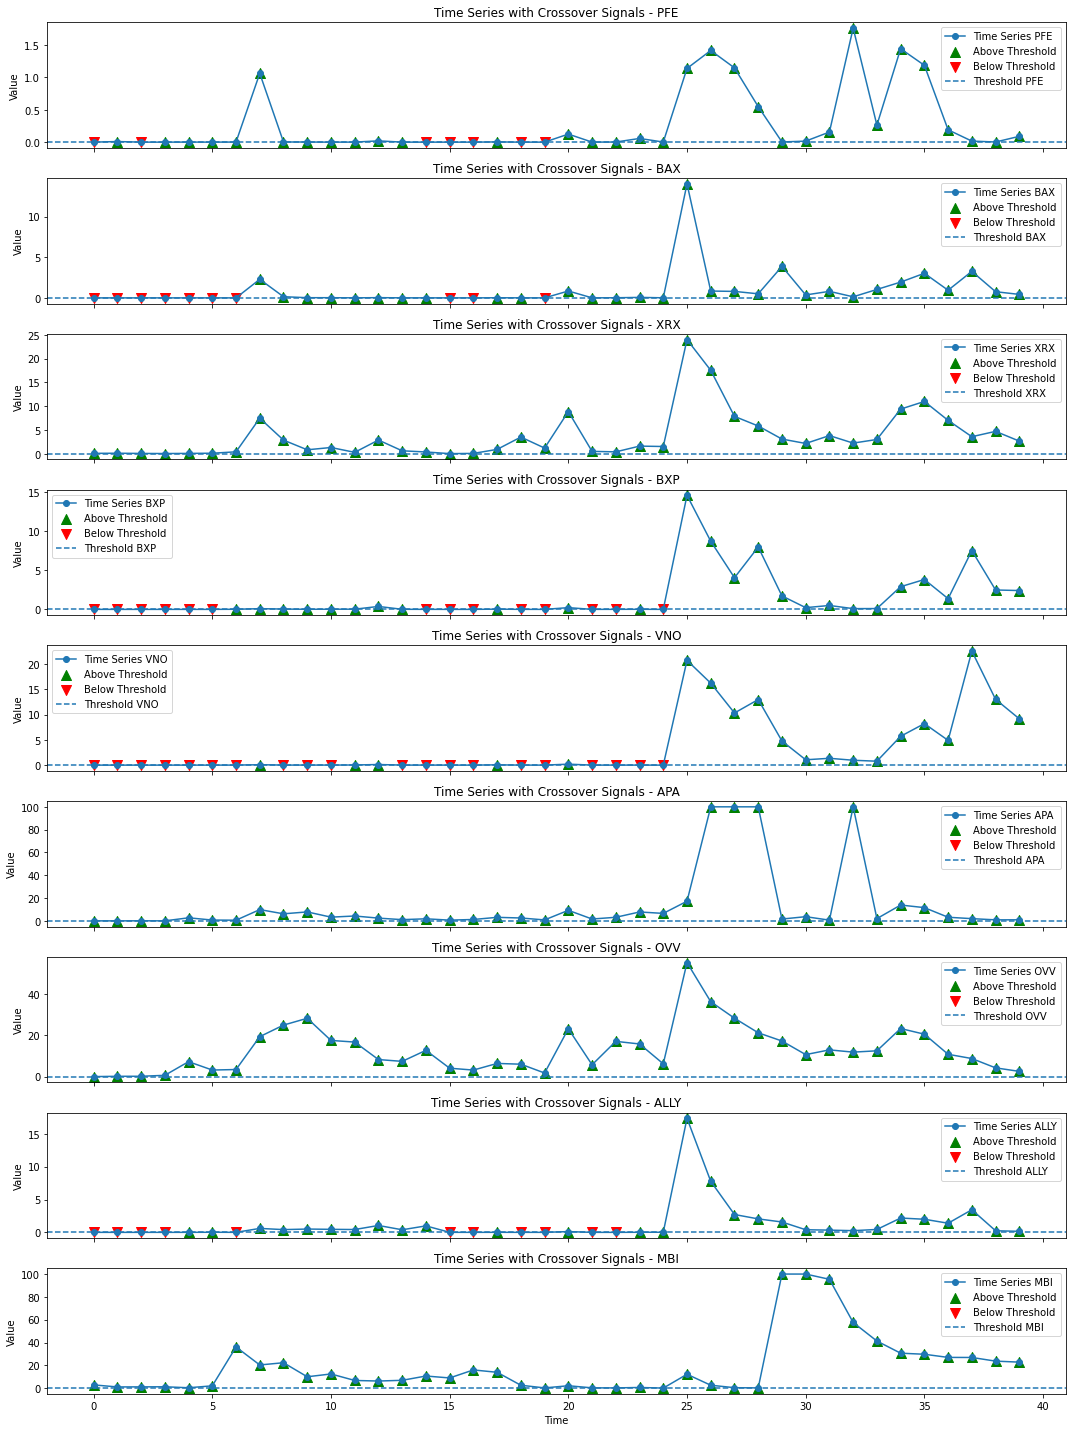

In [34]:
# Dictionary to store time series data for each company
time_series_data = {}

# Loop through the companies and calculate the time series data
for company in companies:
    time_series_data[company] = default_probs[company].to_numpy()

# Create a figure with 9 subplots
fig, axs = plt.subplots(9, 1, figsize=(15, 20), sharex=True)

# Iterate through columns and create subplots
for i, col in enumerate(column_names):
    # Plot the time series data
    axs[i].plot(time_series_data[col], label=f'Time Series {col}', marker='o')

    # Plot crossover signals above the threshold
    above_threshold_signals = [value for i, value in enumerate(time_series_data[col]) if above_thresholds_df[col][i]]
    axs[i].scatter([i for i, signal in enumerate(above_thresholds_df[col]) if signal], above_threshold_signals, color='green', label='Above Threshold', marker='^', s=100)

    # Plot crossover signals below the threshold
    below_threshold_signals = [value for i, value in enumerate(time_series_data[col]) if below_thresholds_df[col][i]]
    axs[i].scatter([i for i, signal in enumerate(below_thresholds_df[col]) if signal], below_threshold_signals, color='red', label='Below Threshold', marker='v', s=100)

    # Add a horizontal line at the threshold
    axs[i].axhline(y=thresholds[col][0], linestyle='--', label=f'Threshold {col}')

    # Add labels and title to each subplot
    axs[i].set_ylabel('Value')
    axs[i].set_title(f'Time Series with Crossover Signals - {col}')

    # Display the legend for each subplot
    axs[i].legend()

# Add common x-axis label
axs[-1].set_xlabel('Time')

# Adjust layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()

